In [1362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

## FOR TRAIN DATA

In [1364]:

# reading two csv files 
data1 = pd.read_csv('/Users/sagar/Developer/ExitTest/train_GzS76OK/train.csv') 
data2 = pd.read_csv('/Users/sagar/Developer/ExitTest/train_GzS76OK/meal_info.csv') 
data3 = pd.read_csv("/Users/sagar/Developer/ExitTest/train_GzS76OK/fulfilment_center_info.csv")


In [1365]:
data1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [1366]:
data2.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [1367]:
data3.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


## Combing columns from the other two csv file to train data

In [1369]:

# using merge function by setting how='inner' 
output1 = pd.merge(data1, data3, 
				on='center_id', 
				how='inner') 

# displaying result 
print(output1) 


             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                           0                  0

In [1370]:
output1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [1371]:
# using merge function by setting how='inner' 
output2 = pd.merge(output1, data2, 
				on='meal_id', 
				how='inner') 



In [1372]:
output2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [1373]:
output2.shape

(456548, 15)

In [1374]:
#Saving the final dataframe into df
df=output2

## Checking for unique values

In [1376]:
df["emailer_for_promotion"].unique()

array([0, 1])

In [1377]:
df["homepage_featured"].unique()

array([0, 1])

In [1378]:
df["week"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145])

## EDA

In [1380]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [1381]:
df.drop("id",axis =1,inplace= True) #removing unnecessary columns

## Checking for duplicates and missing values

In [1383]:
df.isnull().sum()

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [1384]:
df.duplicated().sum()

0

In [1385]:
df.columns.duplicated().sum() # duplicate columns

0

## Splitting into dataframes

In [1387]:
num_df= df.select_dtypes(exclude='object')
cat_df= df.select_dtypes(include='object')

In [1388]:
num_df.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,1,55,1885,136.83,152.29,0,0,177,647,56,2.0
1,1,55,1993,136.83,135.83,0,0,270,647,56,2.0
2,1,55,2539,134.86,135.86,0,0,189,647,56,2.0
3,1,55,2139,339.50,437.53,0,0,54,647,56,2.0
4,1,55,2631,243.50,242.50,0,0,40,647,56,2.0


In [1389]:
cat_df.head()

,center_type,category,cuisine
0,TYPE_C,Beverages,Thai
1,TYPE_C,Beverages,Thai
2,TYPE_C,Beverages,Thai
3,TYPE_C,Beverages,Indian
4,TYPE_C,Beverages,Indian


In [1390]:
#Removing mailid and center id coloumns
num_df.drop("center_id",axis =1,inplace= True) #removing unnecessary columns
num_df.drop("meal_id",axis =1,inplace= True)

## Data distribution

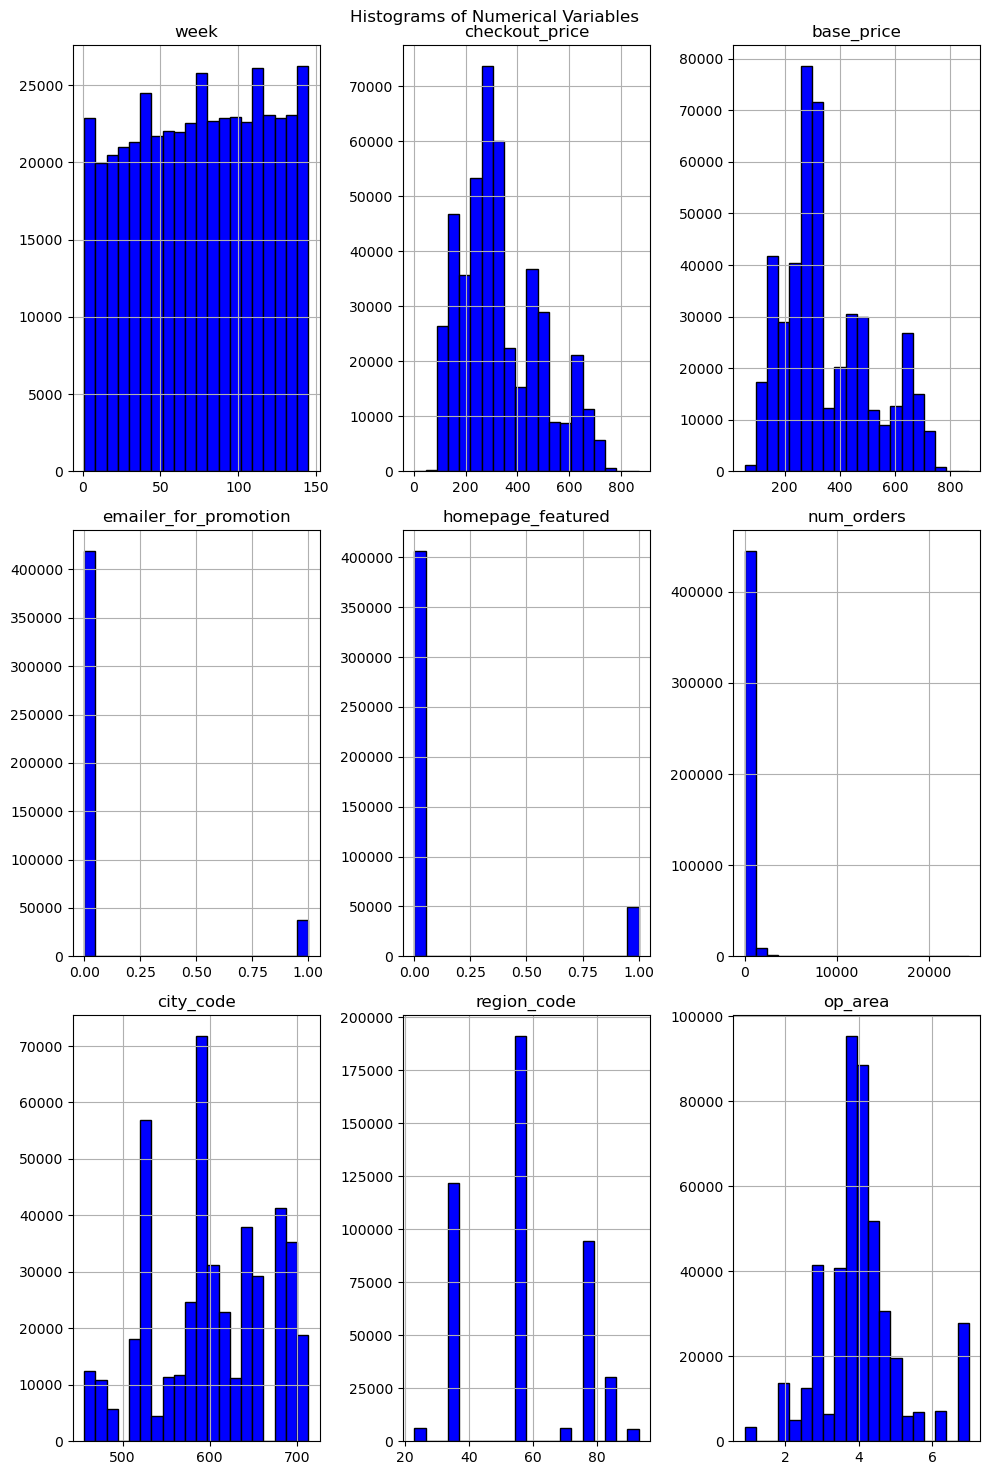

In [1392]:
num_df.hist(figsize=(10, 15), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Correlation

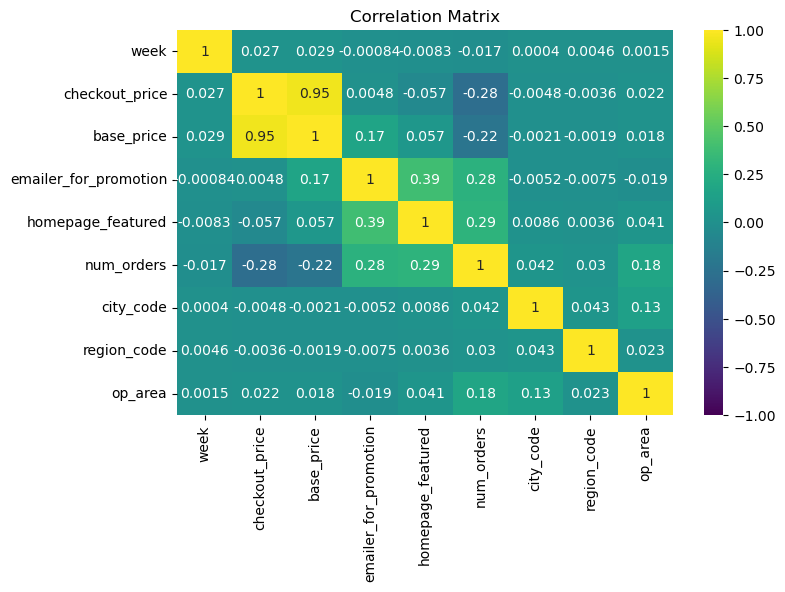

In [1394]:
plt.figure(figsize=(8, 5))
sns.heatmap(num_df.corr(), annot=True,cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 
* There is a strong correlation between base price and the checkout price
* No other strong correlation found

## Outlier detection and handling

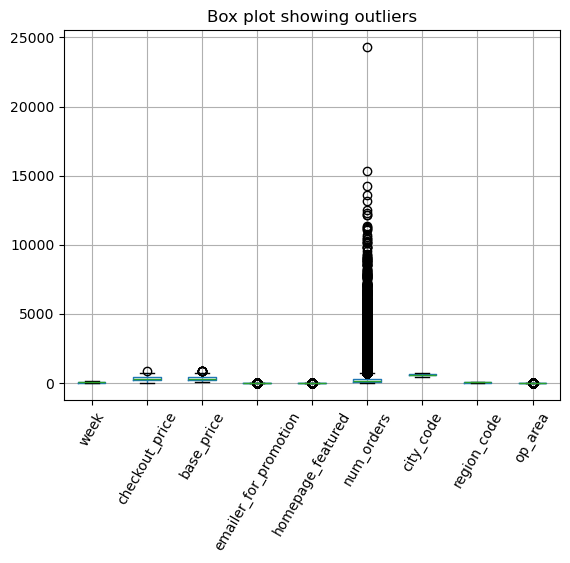

In [1397]:
# Outlier detection
num_df.boxplot()
plt.title('Box plot showing outliers')
plt.xticks(rotation=60)
plt.show()

In [1398]:
def count_outliers_all_columns(df):
    outliers_count = {}
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    return outliers_count
count_outliers_all_columns(num_df)

{'week': 0,
 'checkout_price': 1,
 'base_price': 8,
 'emailer_for_promotion': 37050,
 'homepage_featured': 49855,
 'num_orders': 32937,
 'city_code': 0,
 'region_code': 0,
 'op_area': 51774}

###
* Only a considerable number of ouliers is found for checkout and base price
* Both the columns "emailer for promotion" and "homepage featured" is binary
* Outliers detected on target coloumn
* Only outliers for op_area needed to be clipped

In [1400]:
def handle_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upp_bound=q3+1.5*iqr
    low_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upp_bound)
    df[column_name]=df[column_name].clip(lower=low_bound)
    return df
handle_outliers(num_df,"op_area")

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,1,136.83,152.29,0,0,177,647,56,2.25
1,1,136.83,135.83,0,0,270,647,56,2.25
2,1,134.86,135.86,0,0,189,647,56,2.25
3,1,339.50,437.53,0,0,54,647,56,2.25
4,1,243.50,242.50,0,0,40,647,56,2.25
...,...,...,...,...,...,...,...,...,...
456543,145,484.09,484.09,0,0,68,473,77,4.50
456544,145,482.09,482.09,0,0,42,473,77,4.50
456545,145,237.68,321.07,0,0,501,473,77,4.50
456546,145,243.50,313.34,0,0,729,473,77,4.50


In [1401]:
#After oulier clipping
count_outliers_all_columns(num_df)

{'week': 0,
 'checkout_price': 1,
 'base_price': 8,
 'emailer_for_promotion': 37050,
 'homepage_featured': 49855,
 'num_orders': 32937,
 'city_code': 0,
 'region_code': 0,
 'op_area': 0}

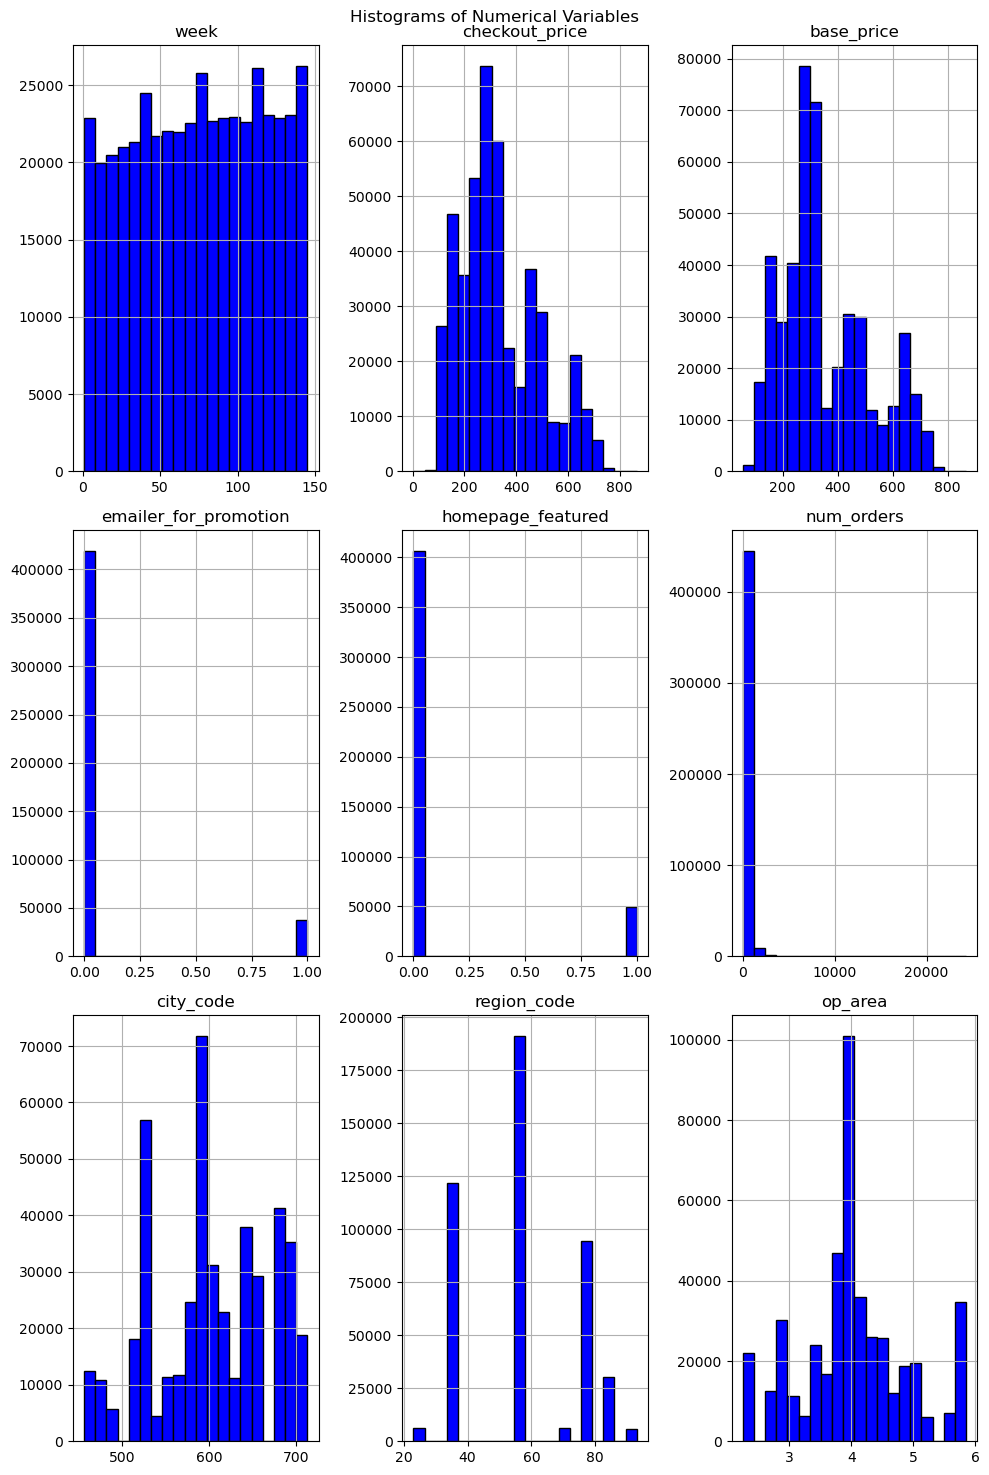

In [1402]:
#After outlier removing
num_df.hist(figsize=(10, 15), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Scaling

In [1404]:
minmax=MinMaxScaler()

In [1405]:
num_df["week"]=minmax.fit_transform(num_df[["week"]])

In [1406]:
num_df["checkout_price"]=minmax.fit_transform(num_df[["checkout_price"]])
num_df["base_price"]=minmax.fit_transform(num_df[["base_price"]])
#num_df["num_orders"]=minmax.fit_transform(num_df[["num_orders"]])
num_df["region_code"]=minmax.fit_transform(num_df[["region_code"]])
num_df["op_area"]=minmax.fit_transform(num_df[["op_area"]])
num_df["city_code"]=minmax.fit_transform(num_df[["city_code"]])

In [1407]:
num_df

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,0.0,0.155056,0.119543,0,0,177,0.743191,0.471429,0.000
1,0.0,0.155056,0.099245,0,0,270,0.743191,0.471429,0.000
2,0.0,0.152774,0.099282,0,0,189,0.743191,0.471429,0.000
3,0.0,0.389818,0.471292,0,0,54,0.743191,0.471429,0.000
4,0.0,0.278617,0.230787,0,0,40,0.743191,0.471429,0.000
...,...,...,...,...,...,...,...,...,...
456543,1.0,0.557303,0.528708,0,0,68,0.066148,0.771429,0.625
456544,1.0,0.554987,0.526242,0,0,42,0.066148,0.771429,0.625
456545,1.0,0.271875,0.327677,0,0,501,0.066148,0.771429,0.625
456546,1.0,0.278617,0.318145,0,0,729,0.066148,0.771429,0.625


## Encoding for catogorical variables

In [1409]:
cat_df.head()

,center_type,category,cuisine
0,TYPE_C,Beverages,Thai
1,TYPE_C,Beverages,Thai
2,TYPE_C,Beverages,Thai
3,TYPE_C,Beverages,Indian
4,TYPE_C,Beverages,Indian


In [1410]:
cat_df["center_type"].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [1411]:
cat_df["category"].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [1412]:
cat_df["cuisine"].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [1413]:
#Since using label encoding differently on test and train data may encode it differently I are using one hot encodr

In [1414]:
OHEncoder = OneHotEncoder(sparse_output=False, drop='if_binary')
columns = cat_df.columns.tolist()
# Fit and transform the data
one_hot_encoded = OHEncoder.fit_transform(cat_df[columns])
encoded_columns = OHEncoder.get_feature_names_out(columns)  # Get feature names for the encoded columns
# Create a new DataFrame with the encoded data, keeping the original index
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_columns, index=cat_df.index)

one_hot_df.head()

,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Combing the dataframes

In [1416]:
df_final= pd.concat([num_df,one_hot_df],axis= 1)
df_final

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0.0,0.155056,0.119543,0,0,177,0.743191,0.471429,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.155056,0.099245,0,0,270,0.743191,0.471429,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.152774,0.099282,0,0,189,0.743191,0.471429,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.389818,0.471292,0,0,54,0.743191,0.471429,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.278617,0.230787,0,0,40,0.743191,0.471429,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1.0,0.557303,0.528708,0,0,68,0.066148,0.771429,0.625,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
456544,1.0,0.554987,0.526242,0,0,42,0.066148,0.771429,0.625,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
456545,1.0,0.271875,0.327677,0,0,501,0.066148,0.771429,0.625,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
456546,1.0,0.278617,0.318145,0,0,729,0.066148,0.771429,0.625,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## MODEL and evaluation

In [1418]:
X = df_final.drop("num_orders", axis=1)
y = df_final["num_orders"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

## Linear regression

In [1420]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred=reg_lin.predict(X_test)

In [1421]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
#RMSE = np.sqrt(MSE)
R2_Score = metrics.r2_score(y_test, y_pred)
print("Mean squared error is",MSE)
print("R2 score is",R2_Score)

Mean squared error is 86296.04080190194
R2 score is 0.4200312237683884


## Randomforest

In [1423]:
model=RandomForestRegressor(n_estimators=10,random_state=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [1424]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
#RMSE = np.sqrt(MSE)
R2_Score = metrics.r2_score(y_test, y_pred)
print("Mean squared error is",MSE)
print("R2 score is",R2_Score)

Mean squared error is 29286.426382185524
R2 score is 0.8031750621321787


## We get best score for RandomForestRegressor

## For Test file


In [1427]:
data4=pd.read_csv("/Users/sagar/Developer/ExitTest/test_QoiMO9B.csv")

## Doing all preprocessing and eda as done on train data

In [1429]:
data4.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [1430]:

# using merge function by setting how='inner' 
output3 = pd.merge(data4, data3, 
				on='center_id', 
				how='inner') 

# displaying result 
output3 


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5


In [1431]:
# using merge function by setting how='inner' 
output4 = pd.merge(output3, data2, 
				on='meal_id', 
				how='inner') 



In [1432]:
output4

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


In [1433]:
dt=output4

In [1434]:
dt.drop("id",axis =1,inplace= True) #removing unnecessary columns
dt.drop("center_id",axis =1,inplace= True) #removing unnecessary columns
dt.drop("meal_id",axis =1,inplace= True) #removing unnecessary columns

In [1435]:
dt

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,146,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,146,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,146,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,146,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,146,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
32568,155,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,155,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,155,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,155,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


In [1436]:
num_dt= dt.select_dtypes(exclude='object')
cat_dt= dt.select_dtypes(include='object')

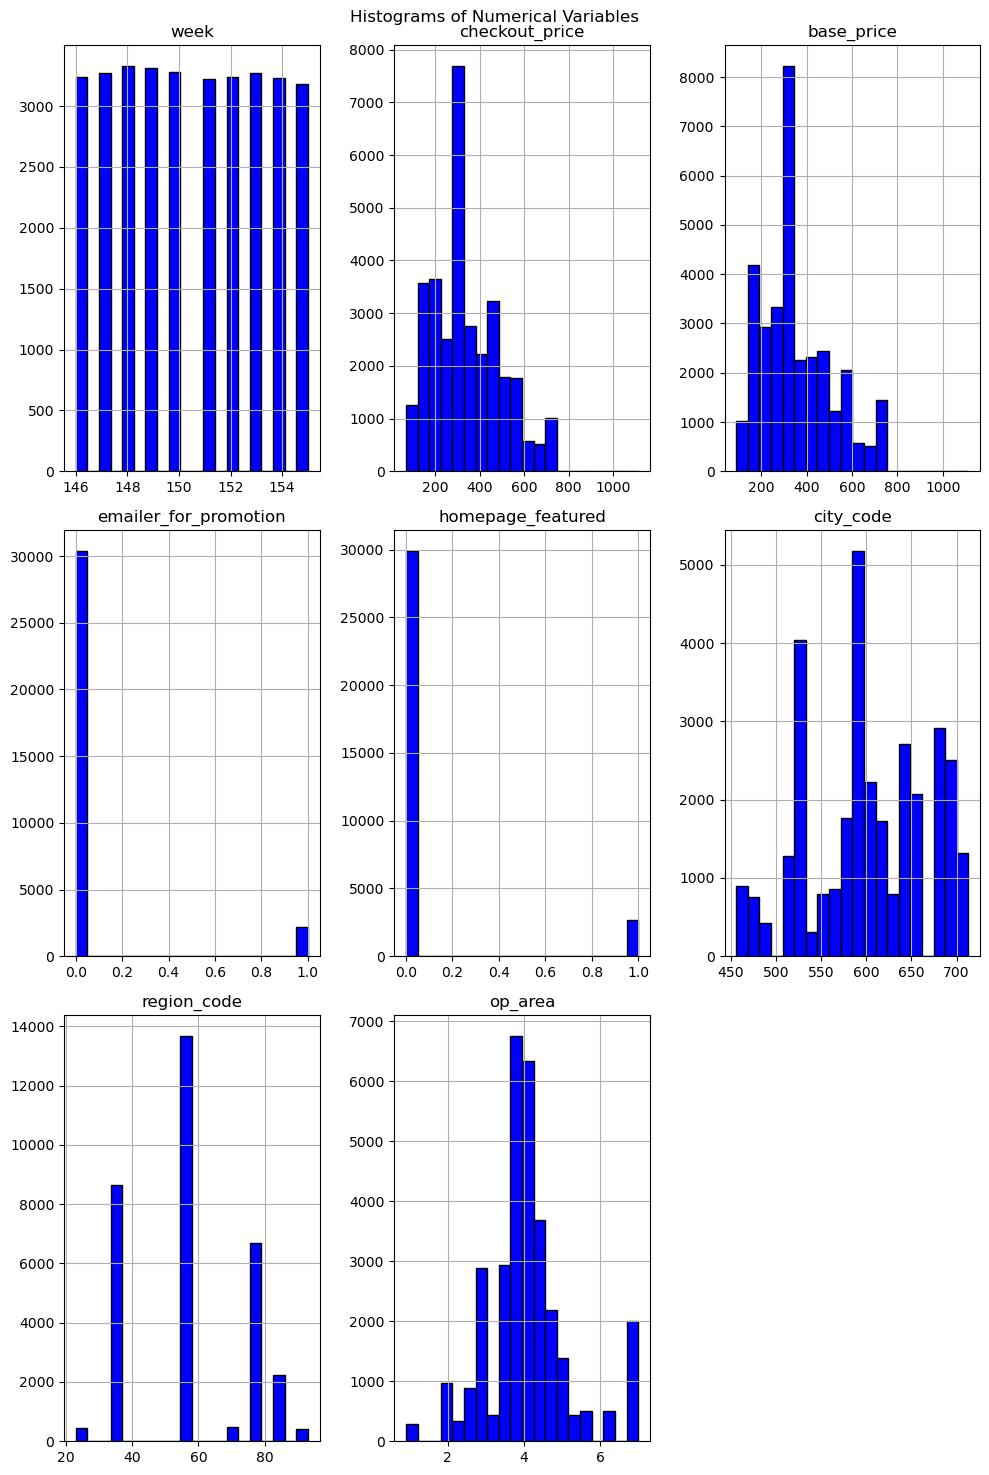

In [1437]:
num_dt.hist(figsize=(10, 15), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

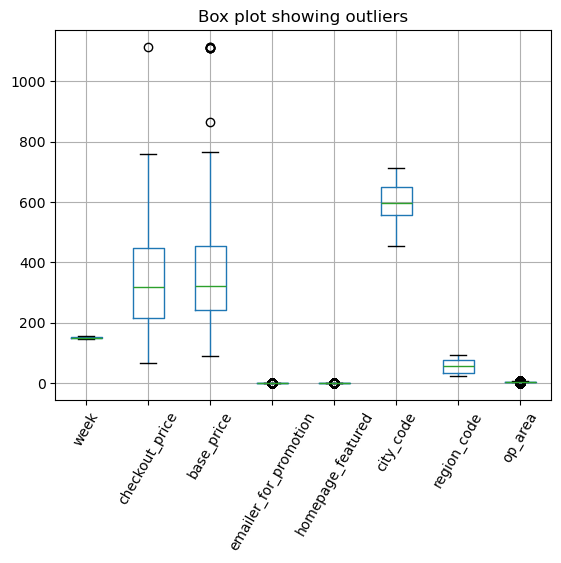

In [1438]:
# Outlier detection
num_dt.boxplot()
plt.title('Box plot showing outliers')
plt.xticks(rotation=60)
plt.show()

In [1439]:
def count_outliers_all_columns(df):
    outliers_count = {}
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    return outliers_count
count_outliers_all_columns(num_dt)

{'week': 0,
 'checkout_price': 1,
 'base_price': 7,
 'emailer_for_promotion': 2164,
 'homepage_featured': 2650,
 'city_code': 0,
 'region_code': 0,
 'op_area': 3769}

In [1440]:
handle_outliers(num_dt,"op_area")

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
0,146,158.11,159.11,0,0,647,56,2.25
1,146,160.11,159.11,0,0,647,56,2.25
2,146,157.14,159.14,0,0,647,56,2.25
3,146,162.02,162.02,0,0,647,56,2.25
4,146,163.93,163.93,0,0,647,56,2.25
...,...,...,...,...,...,...,...,...
32568,155,482.09,484.09,0,0,473,77,4.50
32569,155,483.09,483.09,0,0,473,77,4.50
32570,155,322.07,323.07,0,0,473,77,4.50
32571,155,322.07,323.07,0,0,473,77,4.50


In [1441]:
count_outliers_all_columns(num_dt)

{'week': 0,
 'checkout_price': 1,
 'base_price': 7,
 'emailer_for_promotion': 2164,
 'homepage_featured': 2650,
 'city_code': 0,
 'region_code': 0,
 'op_area': 0}

In [1442]:
num_dt["checkout_price"]=minmax.fit_transform(num_dt[["checkout_price"]])
num_dt["base_price"]=minmax.fit_transform(num_dt[["base_price"]])
#num_df["num_orders"]=minmax.fit_transform(num_df[["num_orders"]])
num_dt["region_code"]=minmax.fit_transform(num_dt[["region_code"]])
num_dt["op_area"]=minmax.fit_transform(num_dt[["op_area"]])
num_dt["city_code"]=minmax.fit_transform(num_dt[["city_code"]])
num_dt["week"]=minmax.fit_transform(num_dt[["week"]])

In [1443]:
num_dt

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
0,0.0,0.086266,0.068274,0,0,0.743191,0.471429,0.000
1,0.0,0.088178,0.068274,0,0,0.743191,0.471429,0.000
2,0.0,0.085338,0.068303,0,0,0.743191,0.471429,0.000
3,0.0,0.090005,0.071117,0,0,0.743191,0.471429,0.000
4,0.0,0.091831,0.072984,0,0,0.743191,0.471429,0.000
...,...,...,...,...,...,...,...,...
32568,1.0,0.396081,0.385829,0,0,0.066148,0.771429,0.625
32569,1.0,0.397037,0.384852,0,0,0.066148,0.771429,0.625
32570,1.0,0.243057,0.228488,0,0,0.066148,0.771429,0.625
32571,1.0,0.243057,0.228488,0,0,0.066148,0.771429,0.625


In [1444]:
OHEncoder = OneHotEncoder(sparse_output=False, drop='if_binary')
columns = cat_dt.columns.tolist()
# Fit and transform the data
one_hot_encoded = OHEncoder.fit_transform(cat_dt[columns])
encoded_columns = OHEncoder.get_feature_names_out(columns)  # Get feature names for the encoded columns
# Create a new DataFrame with the encoded data, keeping the original index
one_hot_dt = pd.DataFrame(one_hot_encoded, columns=encoded_columns, index=cat_dt.index)

one_hot_dt.head()

,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1445]:
dt_final= pd.concat([num_dt,one_hot_dt],axis= 1)
dt_final

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0.0,0.086266,0.068274,0,0,0.743191,0.471429,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.088178,0.068274,0,0,0.743191,0.471429,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.085338,0.068303,0,0,0.743191,0.471429,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.090005,0.071117,0,0,0.743191,0.471429,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.091831,0.072984,0,0,0.743191,0.471429,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1.0,0.396081,0.385829,0,0,0.066148,0.771429,0.625,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32569,1.0,0.397037,0.384852,0,0,0.066148,0.771429,0.625,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32570,1.0,0.243057,0.228488,0,0,0.066148,0.771429,0.625,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32571,1.0,0.243057,0.228488,0,0,0.066148,0.771429,0.625,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## FINAL MODEL TRAINING

In [1447]:
X_train=df_final.drop("num_orders", axis=1)
y_train=df_final["num_orders"]
X_test=dt_final

In [1448]:
model=RandomForestRegressor(n_estimators=10,random_state=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [1449]:
y_pred.shape

(32573,)

## SAmple sub file

In [1472]:
ds=pd.read_csv('/Users/sagar/Developer/ExitTest/sample_submission_hSlSoT6.csv')

In [1474]:
ds

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0
...,...,...
32568,1250239,0
32569,1039516,0
32570,1158107,0
32571,1444235,0


In [1476]:
out=np.round(y_pred)

In [1478]:
out=pd.DataFrame(out,columns =['num_orders'])

In [1482]:
ds.drop("num_orders",axis=1,inplace= True)

In [1484]:
ds

,id
0,1028232
1,1127204
2,1212707
3,1082698
4,1400926
...,...
32568,1250239
32569,1039516
32570,1158107
32571,1444235


In [1486]:
final=pd.concat([ds,out],axis=1)

In [1488]:
final

,id,num_orders
0,1028232,151.0
1,1127204,151.0
2,1212707,151.0
3,1082698,114.0
4,1400926,92.0
...,...,...
32568,1250239,54.0
32569,1039516,54.0
32570,1158107,238.0
32571,1444235,238.0


## Creating output as a csv file

In [1492]:
final.to_csv("Finalstatus.csv",index=False)